# Aprendizaje supervisado

## Librerias y datos

In [5]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data.csv')
#Vars selected
vars_s=['arrival_month','deposit_type_Non Refund','is_repeated_guest','reserverd/assigned','hotel_Resort Hotel']

Y = data.is_canceled
X = data[vars_s]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (20100, 5) (20100,)
Test (9900, 5) (9900,)


## Regresion Logística

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
    
def evaluate_model(X_train, y_train,X_test, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, y_test)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))
   
    print(classification_report(y_test, preds))
    
    logit_roc_auc = roc_auc_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Balanceado

In [17]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)

Training Score:0.6582519647535128
Cross V Score: 0.6582505231460215 +/- 0.009194504102821542
Testing Score: 0.7372727272727273
Cross & Test Diff: -0.0790222041267058
Standard Deviations Away: -8.594504199792139
[[2050    0]
 [ 867  383]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      2050
           1       1.00      0.31      0.47      1250

    accuracy                           0.74      3300
   macro avg       0.85      0.65      0.65      3300
weighted avg       0.82      0.74      0.69      3300



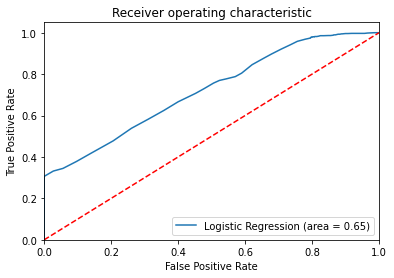

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

reg_log = LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)
evaluate_model(os_data_X, os_data_y, X_test, y_test, reg_log)

## KNN

In [23]:
data.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
0,0,0.0,13.077658,2015.0,27.0,1.0,2.0,5.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,7.755577,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,0.0,13.077658,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [24]:
X = data.iloc[:,2:26].values
Y = data.iloc[:,1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (20100, 24) (20100,)
Test (9900, 24) (9900,)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Primero estandarizamos los valores.

Ahora vamos a buscar cual es el valor de K más óptimo.

In [27]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

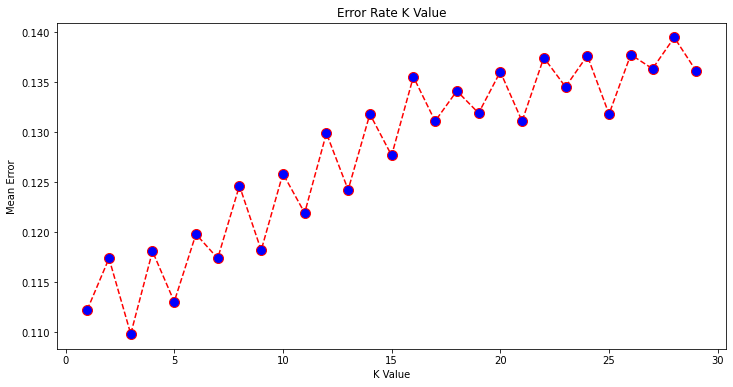

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Nos quedamos con K = 3.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5934  364]
 [ 723 2879]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      6298
         1.0       0.89      0.80      0.84      3602

    accuracy                           0.89      9900
   macro avg       0.89      0.87      0.88      9900
weighted avg       0.89      0.89      0.89      9900



De esta forma obtenemos una precisión de 89% en ambas clases con un recall de 94% y 80% respectivamente.
Lo que significa que encontramos el 80% de casos en los que se cancela la reserva, y predecimos correctamente el 90% de esos.

(El recall nos indica el porcentaje encontrado de esa clase con respecto a todos los elementos de esa misma clase)